In [1]:
import requests
import json
import matplotlib.pyplot as plt
import datetime

# Read data using [NVE's api](http://api.nve.no/doc/hydrologiske-data/)

In [2]:
#Loading key
with open('nve_key','r') as f:
    key = f.read().strip()

In [3]:
#Listing all parameters measured by NVE
headers={'accept': 'application/json',
         'X-API-Key': '{}'.format(key)}

r = requests.get('https://hydapi.nve.no/api/v1/Parameters', headers=headers)

display(json.loads(r.text))                                                                    

{'currentLink': 'https://hydapi.nve.no/api/v1/Parameters',
 'apiVersion': '1.0',
 'license': 'https://data.norge.no/nlod/en',
 'createdAt': '2020-04-17T11:33:14.9450455Z',
 'queryTime': '00:00:00.0000118',
 'itemCount': 19,
 'data': [{'parameter': 0,
   'parameterName': 'Nedbør',
   'parameterNameEng': 'Precipitation',
   'unit': 'mm'},
  {'parameter': 1000,
   'parameterName': 'Vannstand',
   'parameterNameEng': 'Stage',
   'unit': 'm'},
  {'parameter': 1001,
   'parameterName': 'Vannføring',
   'parameterNameEng': 'Discharge',
   'unit': 'm³/s'},
  {'parameter': 1002,
   'parameterName': 'Vannhastighet',
   'parameterNameEng': 'Water speed',
   'unit': 'm/s'},
  {'parameter': 1003,
   'parameterName': 'Vanntemperatur',
   'parameterNameEng': 'Water temperature',
   'unit': '°C'},
  {'parameter': 1004,
   'parameterName': 'Magasinvolum',
   'parameterNameEng': 'Reservoir volume',
   'unit': 'millioner m³'},
  {'parameter': 1006,
   'parameterName': 'Ledningsevne',
   'parameterNameEng

Water temperature is 1003, let's list all stations measuring water temperature

In [4]:
r = requests.get('https://hydapi.nve.no/api/v1/Series',params={'parameter' : '1003'},headers=headers)
allStations = json.loads(r.text)['data']
display(allStations[2])

{'stationId': '1.200.0',
 'stationName': 'Lierelv',
 'parameterName': 'Vanntemperatur',
 'parameter': 1003,
 'versionNo': 1,
 'methodKey': 3,
 'unit': '°C',
 'serieFrom': '2010-01-01T00:00:00',
 'serieTo': None,
 'latitude': 59.92038,
 'longitude': 11.5318,
 'utmEast_Z33': 306146,
 'utmNorth_Z33': 6647624,
 'masl': 134,
 'councilNumber': '3026',
 'councilName': 'Aurskog-Høland',
 'countyName': 'Viken',
 'observationPlace': 'Elv - naturlig profil',
 'measuredOrDerived': 'Målt',
 'resolutionList': [{'resTime': 0,
   'method': 'Instantaneous',
   'timeOffset': 0,
   'dataFromTime': '2010-09-14T13:00:00Z',
   'dataToTime': '2020-04-17T05:00:00Z'},
  {'resTime': 60,
   'method': 'Mean',
   'timeOffset': 0,
   'dataFromTime': '2010-09-14T14:00:00Z',
   'dataToTime': '2020-04-17T05:00:00Z'},
  {'resTime': 1440,
   'method': 'Mean',
   'timeOffset': 0,
   'dataFromTime': '2010-09-15T11:00:00Z',
   'dataToTime': '2020-04-16T11:00:00Z'}]}

Let's load data for the first hit:

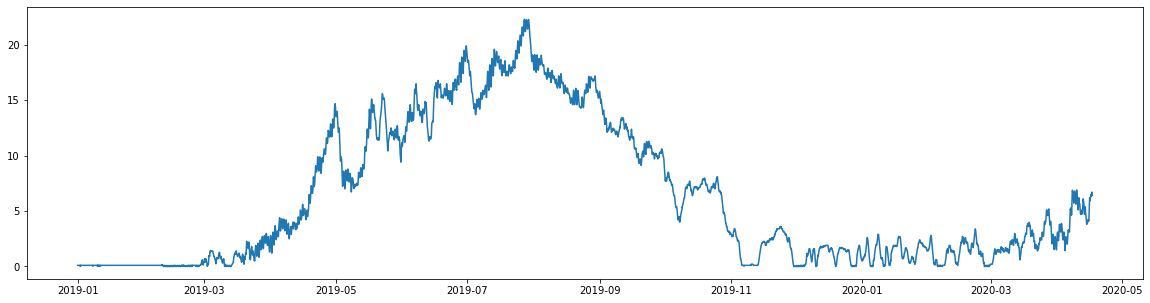

In [5]:
r = requests.get('https://hydapi.nve.no/api/v1/Observations',headers=headers,params={'StationId': '1.200.0', 
                                                                                     'Parameter': '1003', 
                                                                                     'ResolutionTime' : '60',
                                                                                     'ReferenceTime' : '2019-01-01/2020-04-17'})
raw_data = json.loads(r.text)['data'][0]['observations']
#display(raw_data)
t = [datetime.datetime.strptime(i['time'],'%Y-%m-%dT%H:%M:%SZ') for i in raw_data]
values = [i['value'] for i in raw_data ]
plt.figure(figsize=(20,5))
plt.plot(t,values)